<h1><center>Model 5: Balanced Random Forest Classifier Performance</center></h1>

This notebook will look into the performance of the model on the training dataset, inorder to find where and how to improve on future models.

## Import Libraries

In [9]:
import sys
sys.path.append("C:\Project\playground-series-s3e5\src")

from target_mapping import *
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import QuantileTransformer
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [3]:
train = pd.read_csv("../data/clean_data/train.csv", usecols=range(1, 13))
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.770000,12.1,6
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.670000,12.8,6
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.730000,11.3,7
3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.530000,9.8,5
4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.035354,9.5,6


In [14]:
X, y = train.loc[:, train.columns != "quality"], train["quality"]
transformer = QuantileTransformer(output_distribution="normal")
X = transformer.fit_transform(X)

## Import Model

In [4]:
model = joblib.load("../models/model5.pkl")
model

BalancedRandomForestClassifier(n_jobs=-1)

## Analysis

In [15]:
y_pred = model.predict(X)
y_pred = pd.DataFrame(y_pred, columns=["quality"])
y_pred = encoding_to_target(y_pred.quality)
y_true = y

In [16]:
matrix = confusion_matrix(y_true, y_pred, labels=[3, 4, 5, 6, 7, 8])
matrix = pd.DataFrame(matrix, columns=[3, 4, 5, 6, 7, 8], index=[3, 4, 5, 6, 7, 8])

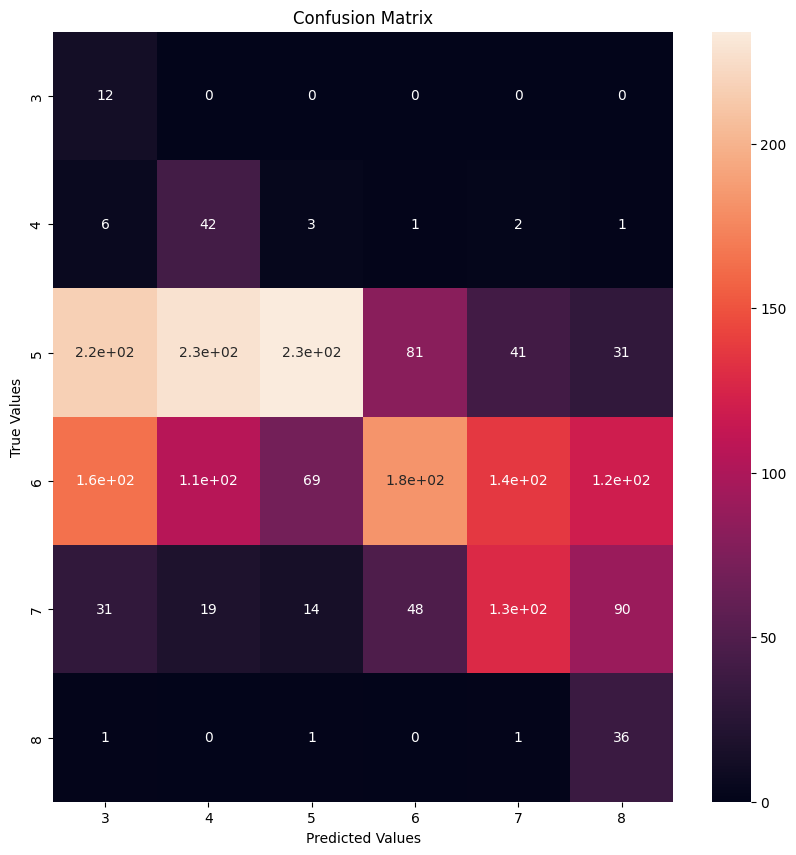

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

There is a high misclassification, where model predicted wine qualit